In [1]:
%load_ext notexbook
%load_ext watermark

In [2]:
%texify

<span class="badges">

[![myBinder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/leriomaggio/deep-unsupervised-learning/HEAD?filepath=2_Clustering/1%20Clustering%20Algorithms.ipynb)
    
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/leriomaggio/deep-unsupervised-learning/blob/main/2_Clustering/1%20Clustering%20Algorithms.ipynb)

[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/leriomaggio/deep-unsupervised-learning/blob/main/2_Clustering/1%20Clustering%20Algorithms.ipynb)
</span>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import hdbscan
%watermark -iv

hdbscan   : 0.8.27
sklearn   : 0.24.1
numpy     : 1.20.2
matplotlib: 3.4.1



# Clustering

Clustering represents the most famous form of **Unsupervised learning** method. 

The task is gathering samples into groups according to some predefined notion of _similarity_ (or _distance_) measure, e.g. _Euclidean distance_.

Here are some common applications of clustering algorithms:

- Compression, as in _data reduction_
- Preprocessing step for recommender systems
- Similarly:
   - grouping related web news (e.g. Google News) and web search results
   - grouping related stock quotes for investment portfolio management
   - building customer profiles for market analysis
- Building a code book of prototype samples for unsupervised feature extraction



## A brief overview of Clustering algorithms

Clustering algorithms can be classified into `3` main categories: (`1`) _classical_ clustering approaches; (`2`) _manifold clustering_ approaches; and (`3`) **deep clustering** approaches[1](#fn1):

**1. Classical clustering approaches**:

Algorithms like `K-Means`, `DBSCAN`, and `Agglomerative Clustering` (`AC`) capture similarities based on a notion of distance in the original data space. As a result, they are considered to be shallow models. 

Although being successfully used in many applications, shallow models suffer from the the **curse of dimensionality** challenge, since the data separation is performed in the raw data space.

In the interest of evading the curse of dimensionality, a bunch of **dimensionality reduction** techniques are usually adopted in combination with clustering algorithms. 

These methods include *linear* transformations like Principal Component Analysis (`PCA`), as well as _non-linear_ methods, such as Multi-dimensional scaling (`MDS`), Isometric Feature Mapping (`Isomap`), and t-distributed Stochastic Neighbourhood Embedding (`t-SNE`).

**Note**: Non-linear techniques rely on the _manifold assumption_, which postulates the existence of low-dimensional manifolds, where the embedded information is concentrated[2](#fn2).

**2. Manifold clustering approaches**:

Manifold clustering also combines discriminative dimensionality reduction with clustering. The very idea is to map the samples to non-linear manifolds by computing a similarity matrix, instead of confining the data to low-dimensional subspaces. `Kernel K-Means` and spectral clustering are popular manifold clustering approaches. However, the representation power of such methods depends on the choice of the kernel function.

**3. Deep clustering approaches**:

Most of the existing deep clustering methods harness an autoencoding architecture. Some other approaches rely on an encoding network without a decoder.

The latter strategy consists of two stages: (I) grouping the embedded features based on a typical clustering algorithm (e.g. `K-Means`) and/or (II) updating the encoding weights using the subsequent pseudo-labels as a supervisory signal. However, these approaches (i.e. with no decoding) suffer from an issue known as **feature randomness**: in the case of the full `Encoder-Decoder` strategy, the decoder serves the purpose to regularise the model by a reconstruction cost. When no reconstruction is provided, there is a risk that features generated by the model are completely random (as in "non representative of the original dataset").

On the other hand, in a standard `Encoder`-`Decoder` architecture, autoencoders are provided with their reconstruction capability, which captures prominent features without forcing any randomness. However, combining clustering and reconstruction is problematic due to the natural trade-off between them. In fact, while the clustering objective function aims to destroy non-discriminative details, the reconstruction objective function allows to preserve all information. This problem is called **feature drift**.

See _Mrabah et. al._ [1](#fn1) for more.


<span id="fn1"><i>[1]: </i> N. Mrabah, N. M. Khan, R. Ksantini, and Z. Lachiri, “Deep clustering with a Dynamic Autoencoder: From reconstruction towards centroids construction,” Neural Networks, 2020 </span>
<span id="fn2"><i>[2]: </i> J. B. Tenenbaum, V. de Silva, and J. C. Langford, “A Global Geometric Framework for Nonlinear Dimensionality Reduction,” Science, 2000
   </span>

---

### A closer look at some Clustering Algorithms

#### K-Means

To cluster well, we need to identify distinct groups such that the instances within a group are similar to each other but different from instances in other groups. 

One such algorithm is `k-means` clustering. 

With this algorithm, we specify the **number of desired clusters** `k`, and the algorithm will assign each instance to exactly one of these `k` clusters. 

It optimizes the grouping by minimizing the **within-cluster** variation (also known as *inertia*) such that the sum of the **within-cluster** variations across all k clusters is as small as possible.

To speed up this clustering process, k-means randomly assigns each observation to one of the k clusters and then begins to reassign these observations to minimize the Euclidean distance between each observation and its cluster’s center point, or centroid. As a result, different runs of k-means - each with a randomized start —will result in slightly different clustering assignments of the observations.

###### K-Means Hands-on

Let's start of with a very simple and obvious example:

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
X.shape

(100, 2)

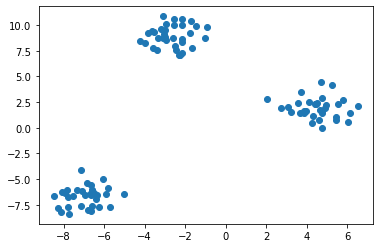

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

There are clearly three separate groups of points in the data, and we would like to recover them using clustering.
Even if the groups are obvious in the data, it is hard to find them when the data lives in a high-dimensional space.

Now we will use one of the simplest clustering algorithms, K-means.

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

**Question:** what would you expect the output to look like?

We can get the cluster labels either by calling fit and then accessing the 
``labels_`` attribute of the K means estimator, or by calling ``fit_predict``.
Either way, the result contains the ID of the cluster that each point is assigned to.

In [7]:
labels = kmeans.fit_predict(X)

In [8]:
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

In [9]:
all(labels == kmeans.labels_)

True

Let's visualize the assignments that have been found

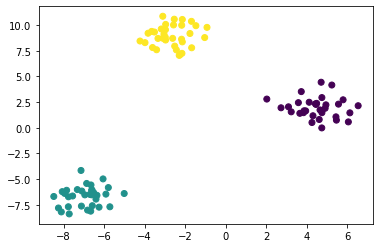

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

Here, we are probably satisfied with the clustering. But in general we might want to have a more quantitative evaluation. How about we compare our cluster labels with the ground truth we got when generating the blobs?

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y, labels))
print(confusion_matrix(y, labels))


0.0
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


In [12]:
np.mean(y == labels)

0.0

Even though we recovered the partitioning of the data into clusters perfectly, the cluster IDs we assigned were arbitrary,
and we can not hope to recover them. Therefore, we must use a different scoring metric, such as ``adjusted_rand_score``, which is invariant to permutations of the labels:

In [13]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, labels)

1.0

**Clustering comes with assumptions**: A clustering algorithm finds clusters by making assumptions with samples should be grouped together. 

Each algorithm makes different assumptions and the quality and interpretability of your results will depend on whether the assumptions are satisfied for your goal. 

For K-means clustering, the model is that all clusters have equal, spherical variance.

**In general, there is no guarantee that structure found by a clustering algorithm has anything to do with what you were interested in**.

We can easily create a dataset that has non-isotropic clusters, on which kmeans will fail:

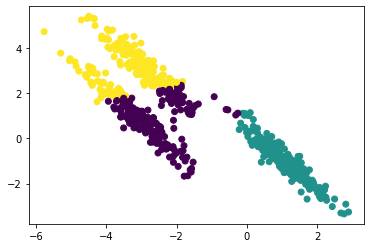

In [14]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

#### Other Clustering Algorithms

###### Hierarchical Clustering

An alternative clustering approach — one that does not require us to precommit to a particular number of clusters — is known as **hierarchical clustering**. 

One version of hierarchical clustering called **agglomerative clustering** uses a tree-based clustering method, and builds what is called a dendrogram. 

A dendrogram can be depicted graphically as an upside-down tree, where the leaves are at the bottom and the tree trunk is at the top.

The leaves at the very bottom are individual instances in the dataset. 

Hierarchical clustering then joins the leaves together — as we move vertically up the upside-down tree — based on how similar they are to each other. 

Once the hierarchical clustering algorithm has finished running, we can view the dendrogram and determine where we want to cut the tree — the lower we cut, the more individual branches we are left with (i.e., more clusters).

###### DBSCAN

An even more powerful clustering algorithm (based on the **density of points**) is known as `DBSCAN` (*density-based spatial clustering of applications with noise*).

Given all the instances we have in space, `DBSCAN` will group together those that are **packed closely** together, where close together is defined as a minimum number of instances that must exist within a certain distance. We specify both the minimum number of instances required and the distance.

**Basic Idea**:

DBSCAN, captures the insight that clusters are dense groups of points. The idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

`Init`: first we choose two parameters, a positive number $\epsilon$ (`epsilon`) and a natural number `min_cluster_size`. 

`Algo`: We begin by picking an arbitrary point in our dataset. If there are more than `min_cluster_size` points within a distance of $\epsilon$ from that point, (including the original point itself), we consider all of them to be part of a "cluster". 
We then expand that cluster by checking all of the new points and seeing if they too have more than `min_cluster_size` points within a distance of $\epsilon$, growing the cluster recursively if so.

Eventually, we run out of points to add to the cluster. We then pick a new arbitrary point and repeat the process. 

`Caveat`: it is entirely possible that a point we pick has fewer than `min_cluster_size` points in its `epsilon` ball, and is also not a part of any other cluster. If that is the case, it's considered a **noise point** not belonging to any cluster.

To see an interactive example of `DBSCAN`, there is this fantastic article: _Visualising DBSCAN Clustering_ (from which much of the description of the algorithm has been adapted from) ([link](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)). 

<span class="fn"><i>Adapted from:</i> Visualising DBSCAN Clustering [link](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)</span>

##### Scikit-learn implementation of Clustering Algorithms


- `sklearn.cluster.KMeans`: <br/>
    The simplest, yet effective clustering algorithm. Needs to be provided with the
    number of clusters in advance, and assumes that the data is normalized as input
    (but use a PCA model as preprocessor).
- `sklearn.cluster.MeanShift`: <br/>
    Can find better looking clusters than KMeans but is not scalable to high number of samples.

- `sklearn.cluster.DBSCAN`: <br/>
    Can detect irregularly shaped clusters based on density, i.e. sparse regions in
    the input space are likely to become inter-cluster boundaries. Can also detect
    outliers (samples that are not part of a cluster).
- `sklearn.cluster.AffinityPropagation`: <br/>
    Clustering algorithm based on message passing between data points.

- `sklearn.cluster.SpectralClustering`: <br/>
    KMeans applied to a projection of the normalized graph Laplacian: finds
    normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.
- `sklearn.cluster.Ward`: <br/>
    Ward implements hierarchical clustering based on the Ward algorithm,
    a variance-minimizing approach. At each step, it minimizes the sum of
    squared differences within all clusters (inertia criterion).


Of these, Ward, SpectralClustering, DBSCAN and Affinity propagation can also work with precomputed similarity matrices.

<img src="images/cluster_comparison.png" width="80%">

**For more see**: [Clustering Algorithm Comparison](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)

---

### New Clustering Algorithms

##### `HDBSCAN`

`hdbscan` is a new algorithm proposed by [Campello, Moulavi, and Sander](http://link.springer.com/chapter/10.1007%2F978-3-642-37456-2_14) which tries to overcome some of the limitations imposed by DBSCAN. In particular, it extends DBSCAN by converting it into a Hierarchical Agglomerative clustering, and then adopting a technique to generate clusters, by partitioning the resulting dendrogram.

There is a complementary notebook which explains HDBSCAN in details: [How HDBSCAN Works](./HDBSCAN%20Algorithm.ipynb).

An implementation of `hdbscan` is available in the omonimous package, as part of `scikit-learn` contrib.

```python
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(data)
```

The official documentation of `hdbscan` is available on [`hdbscan.readthedocs.io`](https://hdbscan.readthedocs.io/en/latest/)

**See More**: [Comparing Python Clustering Algorithms](https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html)

##### `CentNN`: Centroid Neural Network

**Centroid Neural Network** (`CentNN`) is an efficient and stable clustering algorithm that has been successfully applied to numerous problems. 

CentNN does not require a pre-determined learning coefficient but still yields competitive clustering results compared to K-means Clustering or Self-Organizing Map (SOM) whose results heavily depend on the initial parameters.

The idea is very simple, and works somewhat in the opposite direction of a K-Means. However, empirical experiments demonstrated greated stability wrt. K-Means, as well as faster convergence. 

<img src="images/centnn.png" />


More details:

- [Medium: Centroid Neural Network for Clustering with NumPy](https://towardsdatascience.com/centroid-neural-network-for-clustering-with-numpy-cb27327dfab4)

- Original [Paper](https://ieeexplore.ieee.org/document/839021): D.-C. Park, “Centroid neural network for unsupervised competitive learning,” IEEE Transactions on Neural Networks, vol. 11, no. 2, pp. 520–528, 2000

- (Not very efficient) [Python](https://github.com/tranleanh/centroid-neural-networks) implementation

---

### Exercises

#### 1. `digits` clustering using HDBSCAN

Perform K-means clustering on the digits data, searching for ten clusters.
Visualize the cluster centers as images (i.e. reshape each to 8x8 and use
``plt.imshow``)  Do the clusters seem to be correlated with particular digits? What is the ``adjusted_rand_score``?

Visualize the projected digits as in the last notebook, but this time use the
cluster labels as the color.  What do you notice?

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
# ...

#### 2. Efficient Implementation of CentNN Clustering algorithm